In [1]:
import pandas as pd
import numpy as np
import pymysql as sql
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as stats

In [2]:
#Connecting to database to fetch the data
myconnection = sql.connect(host ="localhost",user = "root",password = "Mysql")

In [3]:
cur = myconnection.cursor()

In [4]:
cur.execute("use nutrition")

0

In [5]:
#Loading and Checking the Data
df = pd.read_sql("select * from nutrition.obesity",con = myconnection)
df.head()

C:\Users\DURGA PRASATH\AppData\Local\Temp\ipykernel_20172\196443363.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("select * from nutrition.obesity",con = myconnection)


,region,gender,year,lower_bound,upper_bound,mean_estimate,country,age_group,ci_width,obesity
0,Americas,Male,2017,32.930168,40.913540,36.826302,Bahamas,Adult,7.98337,High
1,Eastern Mediterranean,Male,2020,15.793780,19.245729,17.487640,"Iran, Islamic Republic of",Adult,3.45195,Low
2,Eastern Mediterranean,Male,2020,23.089590,33.815338,28.335529,Iraq,Adult,10.72575,Moderate
3,Europe,Female,2014,24.924770,31.213261,27.948700,Greenland,Adult,6.28849,Moderate
4,Europe,Female,2019,28.160681,35.574928,31.893221,Armenia,Adult,7.41425,High


In [6]:
#Dimenision
df.shape

(27720, 10)

    Rows = 27720
    Columns = 10

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         26268 non-null  object 
 1   gender         27720 non-null  object 
 2   year           27720 non-null  object 
 3   lower_bound    27720 non-null  float64
 4   upper_bound    27720 non-null  float64
 5   mean_estimate  27720 non-null  float64
 6   country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   ci_width       27720 non-null  float64
 9   obesity        27720 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.1+ MB


## Observation
    There are 4 columns with float datatype and 6 columns with object datatype

In [10]:
# Converting the datatype of year to int
df['year'] = df['year'].apply(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         26268 non-null  object 
 1   gender         27720 non-null  object 
 2   year           27720 non-null  int64  
 3   lower_bound    27720 non-null  float64
 4   upper_bound    27720 non-null  float64
 5   mean_estimate  27720 non-null  float64
 6   country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   ci_width       27720 non-null  float64
 9   obesity        27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB


## Observation After change of year datatype
    There are 1 column with int datatype, 4 columns with float datatype and 6 columns with object datatype

In [13]:
# Basic Summary Statistics
df.describe()

,year,lower_bound,upper_bound,mean_estimate,ci_width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,9.393155,17.068489,12.761041,7.675334
std,3.162335,9.893854,12.395013,10.858925,6.616899
min,2012.000000,0.077540,0.547850,0.265670,0.216700
25%,2014.000000,2.354430,7.875503,4.753960,2.926715
50%,2017.000000,6.506535,13.704380,9.944540,5.480535
75%,2020.000000,12.697755,23.986049,17.482418,10.338880
max,2022.000000,74.365372,87.868507,80.609253,40.554062


## Observation
    1. Total of 27720 data entries present in dataset
    2. Mean of the each numrical column is displayed
    3. Standard deviation of the column is displayed
    4. Min and Max value of the column is displayed
    5. Percentile at 25%, 50%, and 75% are displayed

In [15]:
# Summary of dataset with objects included
df.describe(include='object')

,region,gender,country,age_group,obesity
count,26268,27720,27720,27720,27720
unique,6,3,210,2,3
top,Europe,Male,Bahamas,Child,Low
freq,6864,9240,132,20790,24394


In [16]:
# Finding the number of duplicate values
df.duplicated().sum()

0

In [17]:
# Finding duplicate values in each row if present
df[df.duplicated()]

,region,gender,year,lower_bound,upper_bound,mean_estimate,country,age_group,ci_width,obesity


### No Dulicate values found in dataset

In [20]:
# Finding the number if null value
df.isnull().sum()

region           1452
gender              0
year                0
lower_bound         0
upper_bound         0
mean_estimate       0
country             0
age_group           0
ci_width            0
obesity             0
dtype: int64

### We have 0 missing values in the 9 columns except the region column which has 1452 missing values

In [23]:
# Find the precentage of the missing data
(df.isnull().sum() / len(df)) * 100

region           5.238095
gender           0.000000
year             0.000000
lower_bound      0.000000
upper_bound      0.000000
mean_estimate    0.000000
country          0.000000
age_group        0.000000
ci_width         0.000000
obesity          0.000000
dtype: float64

### We have 5.238% of missing values in region column

In [26]:
# Impute missing 'region' values
# Create a mapping from country to region using non-missing data
country_to_region = df.dropna(subset=['region']).set_index('country')['region'].to_dict()

In [27]:
# Function for the 
def matchRegionToCountry(country_region):
    country = country_region[0]
    region = country_region[1]
    if pd.isna(region):
        return country_to_region.get(country)  
    else:
        return region

In [28]:
# Fill missing 'region' values using the mapping
df['region'] = df[['country','region']].apply(matchRegionToCountry, axis=1)

# Fill remaining missing values in 'region' with 'Unknown' , if no value match in mapping
df['region'].fillna('Unknown', inplace=True)

# Verify missing values after imputation
df.isnull().sum()

C:\Users\DURGA PRASATH\AppData\Local\Temp\ipykernel_20172\3225903115.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  country = country_region[0]
C:\Users\DURGA PRASATH\AppData\Local\Temp\ipykernel_20172\3225903115.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  region = country_region[1]
C:\Users\DURGA PRASATH\AppData\Local\Temp\ipykernel_20172\3468119205.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

region           0
gender           0
year             0
lower_bound      0
upper_bound      0
mean_estimate    0
country          0
age_group        0
ci_width         0
obesity          0
dtype: int64

In [29]:
df.to_csv("obesity_processed_dataset.csv")

In [30]:
# Getting the unique values of each column in dataset
df.nunique()

region               7
gender               3
year                11
lower_bound      27541
upper_bound      27591
mean_estimate    27569
country            210
age_group            2
ci_width         27477
obesity              3
dtype: int64

In [31]:
# Check counts for object columns
print("Value counts for 'region':")
print(df['region'].value_counts(dropna=False)) # Include NaN in counts
print("\n")

print("Value counts for 'gender':")
print(df['gender'].value_counts())
print("\n")

print("Value counts for 'age_group':")
print(df['age_group'].value_counts())
print("\n")

print("Value counts for 'obesity':")
print(df['obesity'].value_counts())
print("\n")

print("\nValue counts for 'country' (top 25):")
print(df['country'].value_counts().head(25))
print("\n")

print("Value counts for 'year':")
print(df['year'].sort_values().value_counts())
print("\n")

# Check the range of the 'year' column
print(f"Year range: {df['year'].min()} - {df['year'].max()}")
print("\n")

Value counts for 'region':
region
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
South-East Asia          1452
Unknown                  1452
Name: count, dtype: int64


Value counts for 'gender':
gender
Male      9240
Female    9240
Both      9240
Name: count, dtype: int64


Value counts for 'age_group':
age_group
Child    20790
Adult     6930
Name: count, dtype: int64


Value counts for 'obesity':
obesity
Low         24394
High         1929
Moderate     1397
Name: count, dtype: int64



Value counts for 'country' (top 25):
country
Bahamas                  132
Guyana                   132
Dominican Republic       132
Somalia                  132
Kenya                    132
Bahrain                  132
Indonesia                132
Vanuatu                  132
Bermuda                  132
Saint Kitts and Nevis    132
Japan                    132
Puerto Rico              132
Nauru      

In [32]:
# Displays column name
df.columns

Index(['region', 'gender', 'year', 'lower_bound', 'upper_bound',
       'mean_estimate', 'country', 'age_group', 'ci_width', 'obesity'],
      dtype='object')

In [33]:
#Differentiating the feature into numeric and categorical
numeric_features = ['lower_bound', 'upper_bound', 'mean_estimate', 'ci_width', 'year']
categorical_features = ['region', 'gender', 'country', 'age_group', 'obesity']

In [34]:
# print columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 5 numerical features : ['lower_bound', 'upper_bound', 'mean_estimate', 'ci_width', 'year']
We have 5 categorical features : ['region', 'gender', 'country', 'age_group', 'obesity']


In [134]:
# Checking the skewness of the numerical columns
print(f'skewness_of_lower_bound : {skew(df['lower_bound'])}')
print(f'skewness_of_upper_bound : {skew(df['upper_bound'])}')
print(f'skewness_of_mean_estimate : {skew(df['mean_estimate'])}')
print(f'skewness_of_ci_width : {skew(df['ci_width'])}')
print(f'skewness_of_year : {skew(df['year'])}')

skewness_of_lower_bound : 2.2031444122560093
skewness_of_upper_bound : 1.4109575185719303
skewness_of_mean_estimate : 1.8565676397844932
skewness_of_ci_width : 1.5495810538935453
skewness_of_year : 0.0


## Univariate Analysis

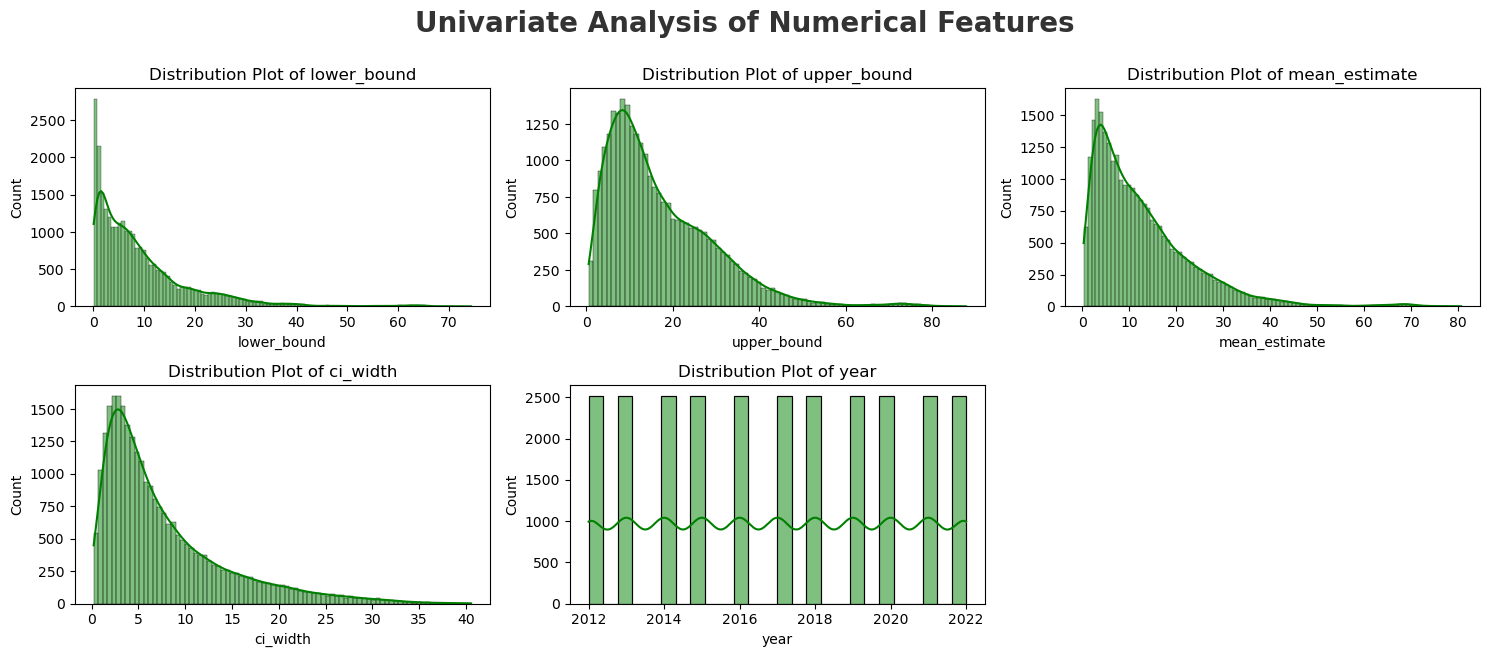

In [37]:
# Histo plot of Numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[numeric_features[i]],kde=True, color='g')
    plt.xlabel(numeric_features[i])
    plt.title(f'Distribution Plot of {numeric_features[i]}')
plt.tight_layout()
plt.show()

# Obervation
    1. lower_bound, upper_bound, mean_estimate and ci_width distributions are positive skewed or right skewed and it is leptoKurtosis.
    2. lower_bound, upper_bound, mean_estimate and ci_width distributions the central tendency value like  be Mean > Median > Mode.
    3. The year column show the uniform distribution of data.
    4. Year column has no skewness since the distribution is uniform and Mean = Median = Mode.
    5. Most of the value of lower_bound are to the left side of ploting which shows that data points are to the minimum.
    6. Most of the value of upper_bound are to the left side of ploting which shows that data points are minimum.
    7. Most of the value of mean_estimate are to the left side of ploting which shows that data points are minimum.
    8. Most of the value of ci_width are to the left side of ploting which shows that data points are minimum.
    5. On each year the data entries points are equal.

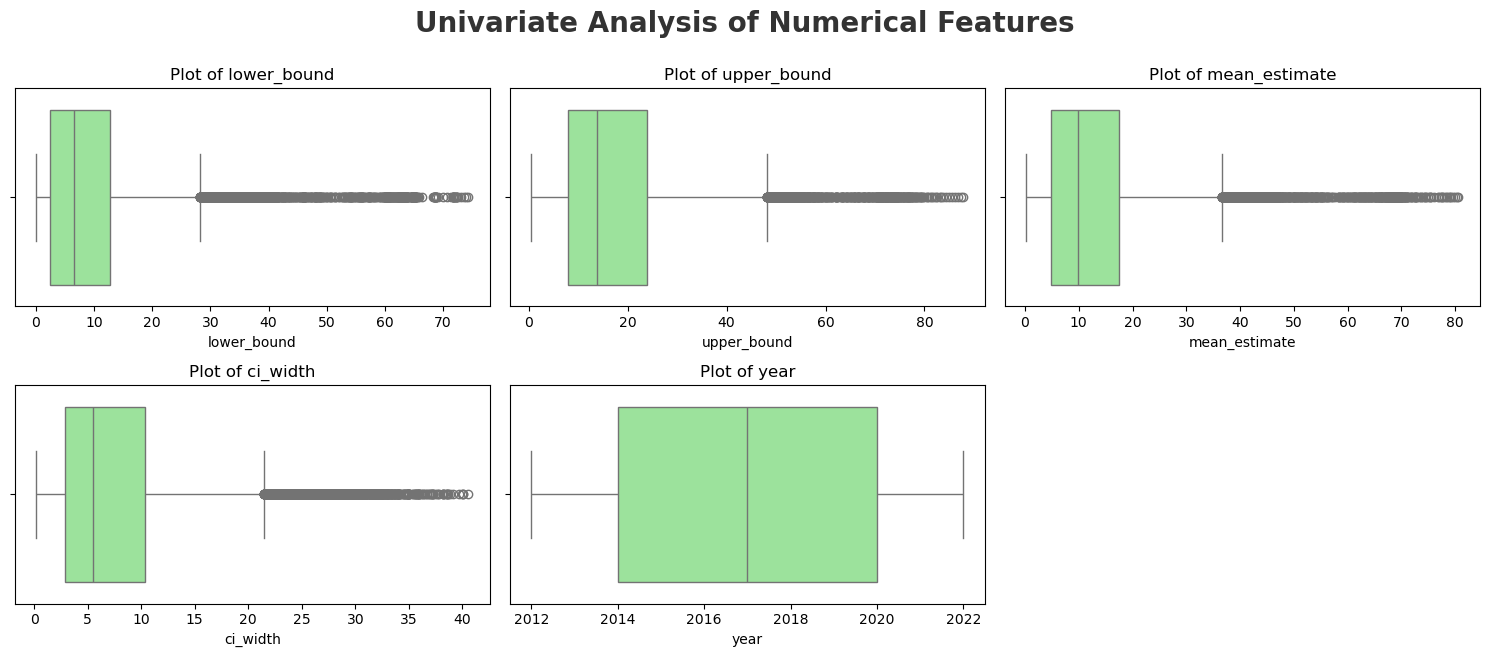

In [39]:
# Box plot of Numerical columns to see outlier
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i,col in enumerate(numeric_features):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.xlabel(numeric_features[i])
    plt.title(f'Plot of {numeric_features[i]}')
plt.tight_layout()
plt.show()

# Obervation
    1) Median line of lower_bound, upper_bound, mean_estimate and ci_width are towards the left side of the plot.
    2) We can confirm from the boxplot that lower_bound, upper_bound, mean_estimate and ci_width are positive skewed or right skewed.
    3) Year has symmetric distribution and Median line is almost in mid of the distribution plot.
    4) lower_bound, upper_bound, mean_estimate and ci_width columns have many outlier data point 

In [41]:
#Function to get the number of outlier in the columns
def count_outliers_iqr(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

In [42]:
#Seeing the number of outlier in columns
print(f'Number of outlier in lower_bound : {count_outliers_iqr(df['lower_bound'])}')
print(f'Number of outlier in upper_bound : {count_outliers_iqr(df['upper_bound'])}')
print(f'Number of outlier in mean_estimate : {count_outliers_iqr(df['mean_estimate'])}')
print(f'Number of outlier in ci_width : {count_outliers_iqr(df['ci_width'])}')

Number of outlier in lower_bound : 1386
Number of outlier in upper_bound : 580
Number of outlier in mean_estimate : 958
Number of outlier in ci_width : 1478


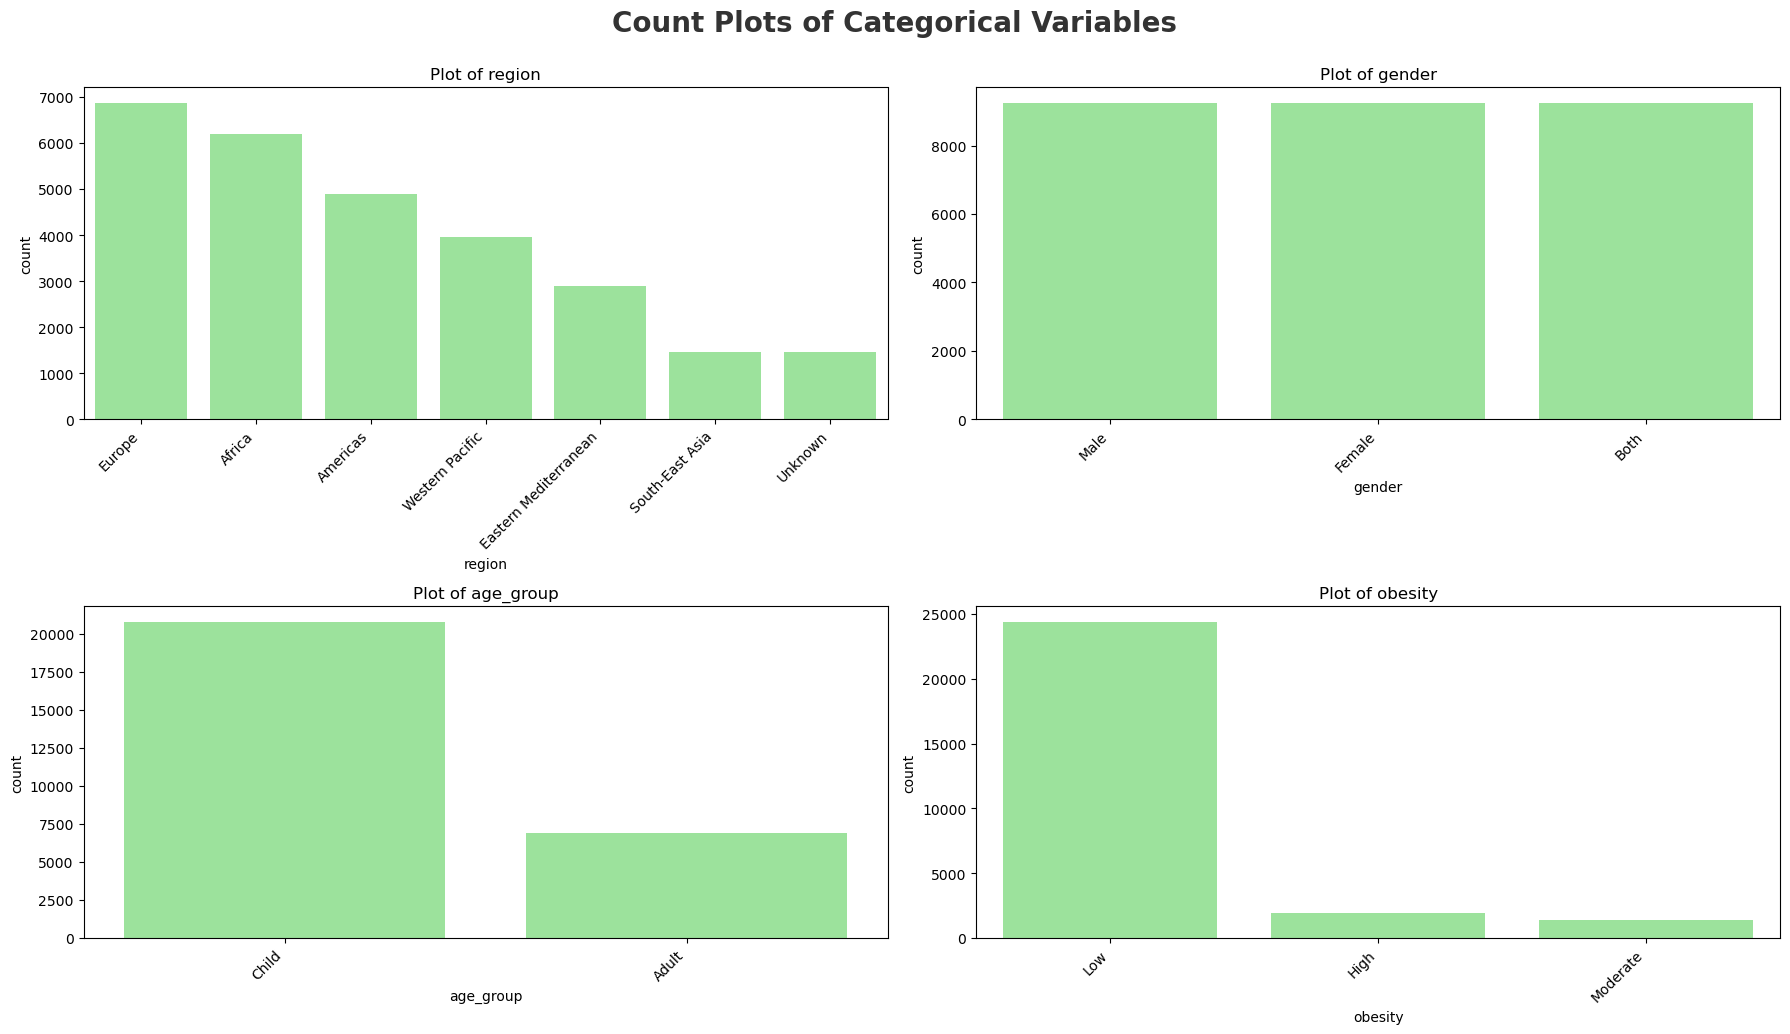

In [43]:
# Histo plot for Categorical columns
categorical_cols = ['region', 'gender', 'age_group', 'obesity']

plt.figure(figsize=(18, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=col, data=df, color='lightgreen',order = df[col].value_counts().index)
    plt.title(f'Plot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.suptitle('Count Plots of Categorical Variables',  fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

# Observations of the categorical variables:

## region:

    1) 'Europe', 'Africa', and 'Americas' are the regions with the highest number of entries in the dataset.
    2) 'Western Pacific', 'Eastern Mediterranean', and 'South-East Asia' have progressively fewer entries.
    3) The 'Unknown' category (imputed values) also known has a nan of entries, which confirms the missing data imputation.

## gender:

    1) The counts for 'Male', 'Female', and 'Both' genders are almost perfectly equal. 
    2) This indicates a balanced representation of gender categories in the dataset.

## age_group:

    1) The 'Child' age group has a higher count compared to the 'Adult' age group.
    2) Since child count is higher, the data of childer's obesity data is more then the adult's in dataset.

## obesity:

    1) The 'Low' obesity category is higher count in the dataset, compare to 'High' and 'Moderate' categories combined.
    2) 'High' obesity has a higher count than 'Moderate' obesity.
    3) 'Moderate' obesity has a leastest count.

In [45]:
# Bivariate Analysis

# 1. Numerical vs. Numerical
# Correlation Matrix and Heatmap
numerical_cols = ['lower_bound', 'upper_bound', 'mean_estimate', 'ci_width', 'year']
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

               lower_bound  upper_bound  mean_estimate  ci_width      year
lower_bound       1.000000     0.846994       0.963703  0.091380  0.041926
upper_bound       0.846994     1.000000       0.956546  0.606776  0.165787
mean_estimate     0.963703     0.956546       1.000000  0.350868  0.105138
ci_width          0.091380     0.606776       0.350868  1.000000  0.247870
year              0.041926     0.165787       0.105138  0.247870  1.000000


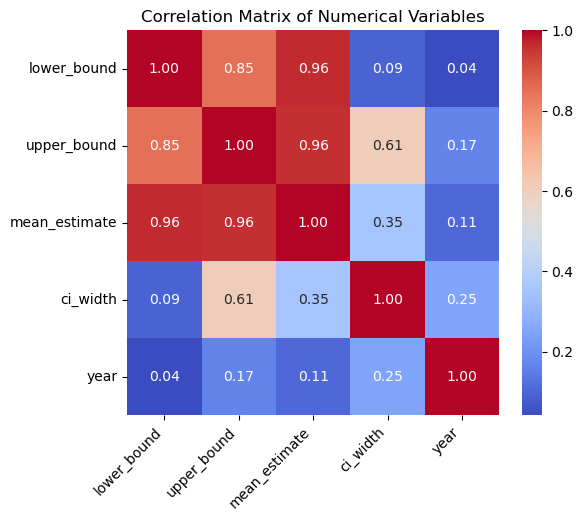

In [46]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Observations from the correlation matrix heatmap of the numerical variables:

## Strong Positive Correlations (Near 1.0):

    mean_estimate is highly correlated with both lower_bound (0.96) and upper_bound (0.96). This is expected, as mean_estimate is the central value between lower_bound and upper_bound, and these three variables inherently describe the same estimated range.
    lower_bound and upper_bound also show a strong positive correlation with each other (0.85).

## Moderate Positive Correlation (Around mid 0.5):

    ci_width (confidence interval width) shows a moderate positive correlation with upper_bound (0.61) and mean_estimate (0.35). This suggests that as the estimated obesity percentage (mean_estimate) increases, or the upper limit of the estimate (upper_bound) increases, the confidence interval around that estimate tends to get wider. This could indicate greater variability or uncertainty in higher obesity estimates.

## Weak Positive Correlations (Near 0):

    year has a weak positive correlation with ci_width (0.25), upper_bound (0.17), and mean_estimate (0.11). This suggests a slight, albeit not strong, increasing trend in the estimated obesity percentages and the width of their confidence intervals over the years in the dataset.
    lower_bound shows a very weak positive correlation with year (0.04).

## No Strong Negative Correlations:

    There are no strong negative correlations observed between any of the numerical variables, indicating that as one variable increases, the other doesn't consistently decrease.

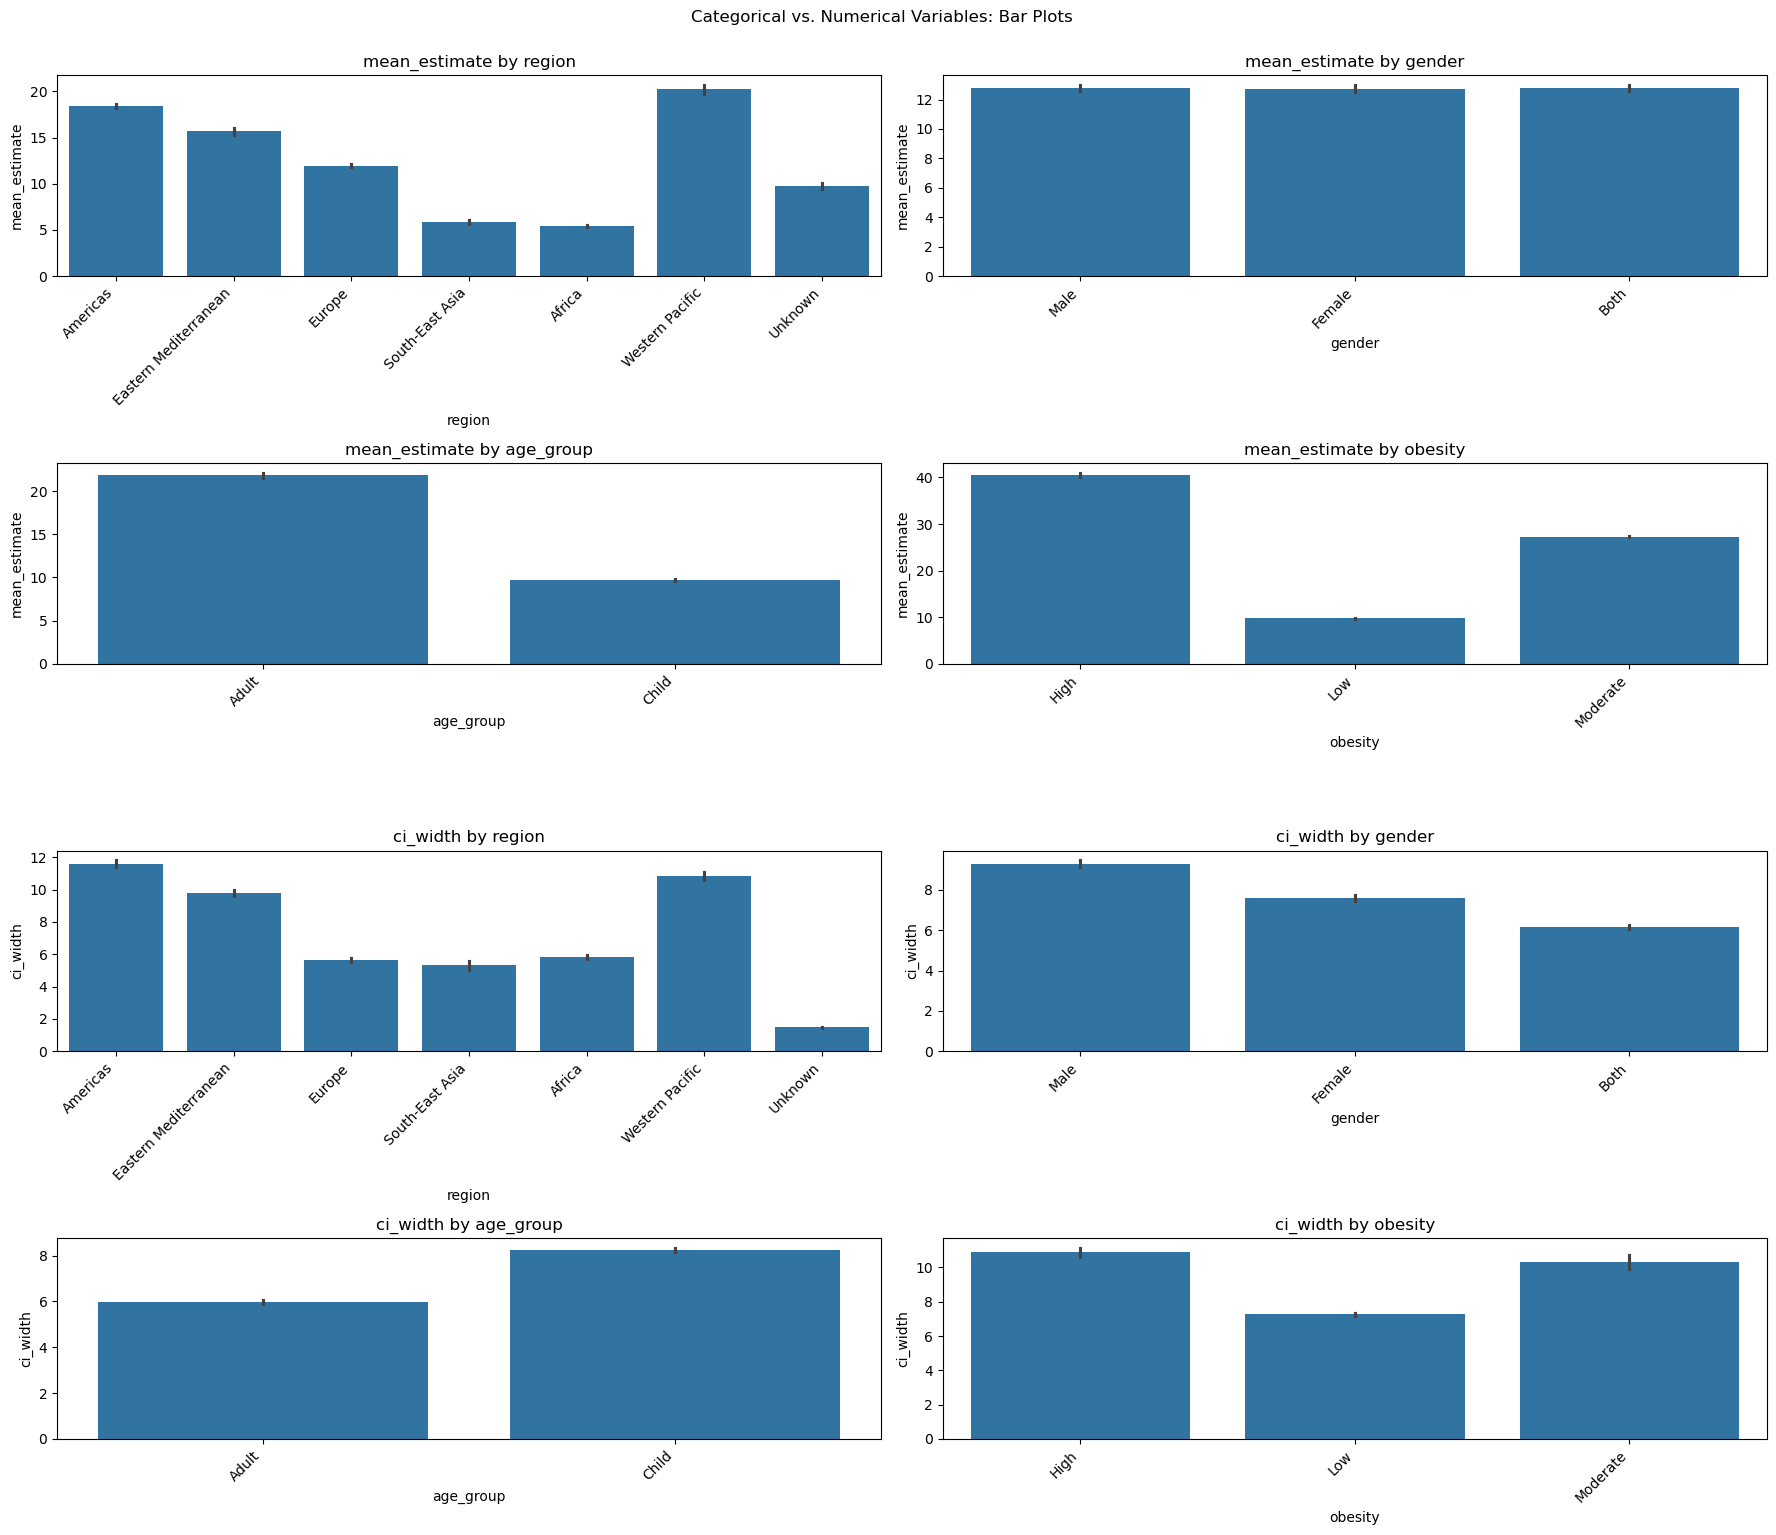

In [48]:
# 2. Categorical vs. Numerical
# Box plots of mean_estimate and ci_width across categorical variables
categorical_num_pairs = [
    ('region', 'mean_estimate'),
    ('gender', 'mean_estimate'),
    ('age_group', 'mean_estimate'),
    ('obesity', 'mean_estimate'),
    ('region', 'ci_width'),
    ('gender', 'ci_width'),
    ('age_group', 'ci_width'),
    ('obesity', 'ci_width')
]

plt.figure(figsize=(18, 15))
for i, (cat_col, num_col) in enumerate(categorical_num_pairs):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x=cat_col, y=num_col, data=df)
    plt.title(f'{num_col} by {cat_col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('Categorical vs. Numerical Variables: Bar Plots', y=1.02)
plt.show()

# Observations from the bar plots 
## mean_estimate and ci_width across different categorical variables:

    1.mean_estimate and region:
        'Western Pacific' and 'Americas' regions show the highest mean_estimate values, indicating high obesity percentages in these regions.
        'South-East Asia' and 'Africa' have low mean_estimate values.
        'Eastern mediterranean' and 'Europe' have moderate mean_estimate values.
        The 'Unknown' region has an mean_estimate somewhere in the middle, reflecting the averages of the countries it represents whose regions were initially missing.

    2.mean_estimate and gender:
        The bars are almost at the same height. So mean_estimate values is similar across 'Male', 'Female', and 'Both' genders.

    3.mean_estimate and age_group:
        This plot shows a large difference, the 'Adult' age group has a significantly higher mean_estimate compared to the 'Child' age group. This clearly indicates that obesity percentages much higher in adults than in children.

    4.mean_estimate and obesity:
        The mean_estimate values are clearly separated by the obesity categories: 'High' has the highest, 'Moderate' is in the middle, and 'Low' has the lowest mean_estimate.

    5.ci_width and region:
        Similar to mean_estimate, 'Americas' and 'Western Pacific'show high level in ci_width values as well.
        'Eastern mediterranean' have moderately lesser level then 'Americas' and 'Western Pacific'.
        'South-East Asia','Europe' and 'Africa' have almost similar ci_width values.
        'Unknown' have the least ci_width values.

    6.ci_width by gender:
        The ci_width values are high in "Male','Female' is slight less then 'Male' and 'Both' in slight less then 'Female'.

    7.ci_width by age_group:
        The 'Child' age group has a noticeably higher ci_width than the 'Adult' age group.

    8.ci_width by obesity:
        The ci_width values are clearly separated by the obesity categories: 'High' has the highest, 'Moderate' is in the middle, and 'Low' has the lowest ci_width.

<!-- ## Here are the observations from the bar plots 

### lower_bound and upper_bound across different categorical variables:

    1.lower_bound and region:
        'Western Pacific' and 'Americas' regions show high lower_bound values. This suggests that even the lower estimates of obesity are higher in these regions compared to others.
        'Unknown' region (imputed) has an stightly high then 'South-East Asia' and 'Africa'.
        'South-East Asia' and 'Africa' tend to have the lowest lower_bound values.
        
    2.lower_bound and gender:
        The lower_bound values are very stightly similar across 'Male', 'Female', and 'Both' genders.

    3.lower_bound and age_group:
        The 'Adult' age group has a significantly higher lower_bound compared to the 'Child' age group. This reinforces the observation that adult obesity estimates are generally much higher, even at their lower bounds.

    4.lower_bound and obesity:
        The lower_bound values are clearly separated by the obesity categories: 'High' has the highest, 'Moderate' is in the middle, and 'Low' has the lowest lower_bound.

    5.upper_bound and region:
        'Western Pacific' and 'Americas' show the highest upper_bound values, indicating higher upper limits for obesity estimates in these regions.
        'Unknown' region (imputed) has an upper_bound that falls in the middle range.
        'South-East Asia' and 'Africa' have the lowest average upper_bound values.

    6.upper_bound and gender:
        Similar to lower_bound, the upper_bound values are very close across all gender categories, suggesting gender has little impact on the upper range of obesity estimates.

    7.upper_bound and age_group:
        The 'Adult' age group consistently shows a much higher upper_bound than the 'Child' age group, further emphasizing the higher estimated obesity levels in adults.

    8.upper_bound and obesity:
        The upper_bound values are clearly separated by the obesity categories: 'High' has the highest, 'Moderate' is in the middle, and 'Low' has the lowest upper_bound.

        
In summary, these bar plots confirm the patterns observed in the box plots of mean_estimate because lower_bound and upper_bound are highly correlated with mean_estimate. The age_group and obesity categories show the most significant differences in average lower_bound and upper_bound values, while gender shows very little difference. Regional variations are also evident, with 'Western Pacific' and 'Americas' generally having higher estimated obesity ranges. -->

In [52]:
# 3. Categorical vs. Categorical
# Crosstabulations for key categorical relationships
print("\nCrosstab: Region vs. Obesity")
print(pd.crosstab(df['region'], df['obesity']))

print("\nCrosstab: Gender vs. Obesity")
print(pd.crosstab(df['gender'], df['obesity']))

print("\nCrosstab: Age Group vs. Obesity")
print(pd.crosstab(df['age_group'], df['obesity']))


Crosstab: Region vs. Obesity
obesity                High   Low  Moderate
region                                     
Africa                   44  6102        58
Americas                527  3968       389
Eastern Mediterranean   306  2446       152
Europe                  258  6205       401
South-East Asia           0  1452         0
Unknown                  26  1376        50
Western Pacific         768  2845       347

Crosstab: Gender vs. Obesity
obesity  High   Low  Moderate
gender                       
Both      596  8116       528
Female    834  7978       428
Male      499  8300       441

Crosstab: Age Group vs. Obesity
obesity    High    Low  Moderate
age_group                       
Adult      1620   4350       960
Child       309  20044       437


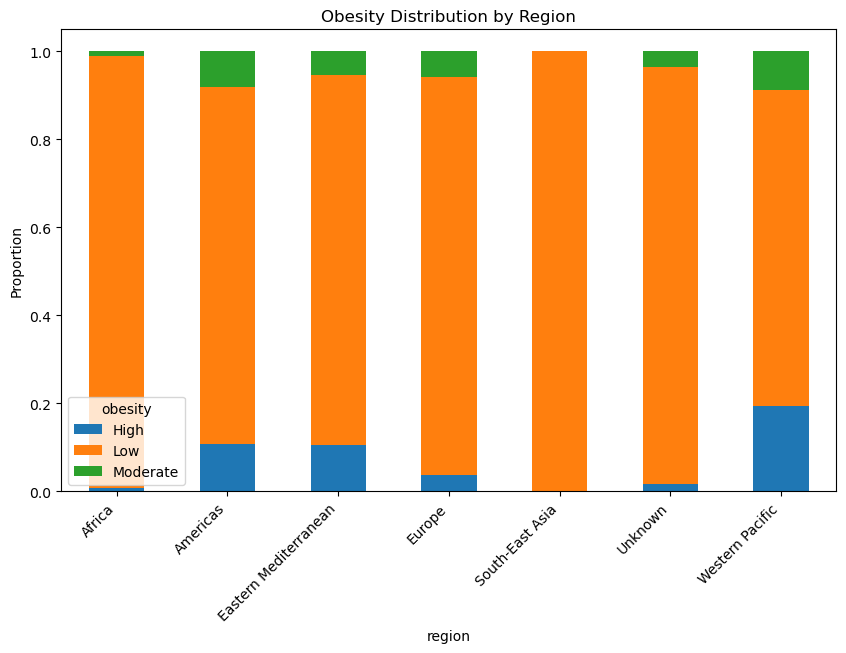

In [53]:
# Stacked Bar Charts for categorical relationships
# Region vs. Obesity
df_region_obesity = pd.crosstab(df['region'], df['obesity'], normalize='index')
df_region_obesity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Obesity Distribution by Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.show()

## Observations from the stacked bar 'Obesity Distribution by Region':

    Across all regions, the 'Low' obesity category as the largest proportion.

    'Western Pacific' and 'Americas' show a visibly larger proportion of 'High' and 'Moderate' obesity compared to other regions.

    'Europe' and 'Eastern Mediterranean' also have 'High' and 'Moderate' obesity, but their proportions are smaller than 'Western Pacific' and 'Americas'.

    'Africa' has a very small proportion of 'High' and 'Moderate' obesity, with 'Low' almost the entire bar.

    'South-East Asia' region stands out as it shows almost exclusively 'Low' obesity, with no proportions of 'High' or 'Moderate' obesity.

    'Unknown' Region: The 'Unknown' region (which was imputed) also have 'High' and 'Moderate' obesity, with 'Low' as small proportions.

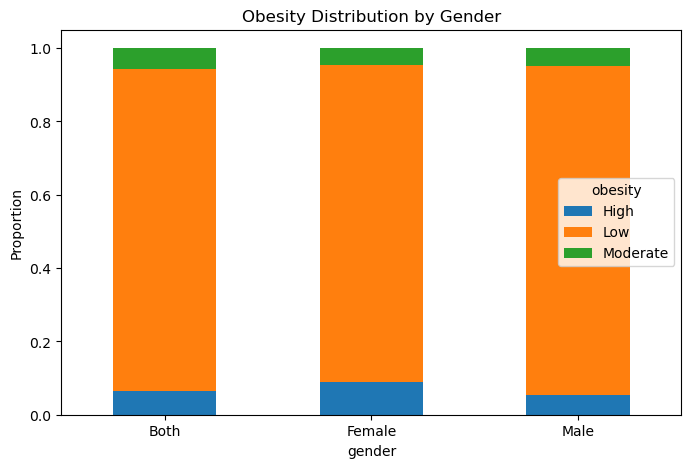

In [55]:
# Gender vs. Obesity
df_gender_obesity = pd.crosstab(df['gender'], df['obesity'], normalize='index')
df_gender_obesity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Obesity Distribution by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

## Observations from the stacked bar chart of 'Obesity Distribution by Gender':

    For all gender categories ('Male', 'Female', and 'Both'), the 'Low' obesity category is majorly observed.

    'Male', 'Female' and 'Both' categories have almost a similar proportion of 'high' obesity.

    'Female' categories shows, larger 'low' obesity proportion comparing to 'Male' and 'Both'.

    Categories of the gender shows that obesity is not only relating towards one or two gender categories but all gender have the obesity.

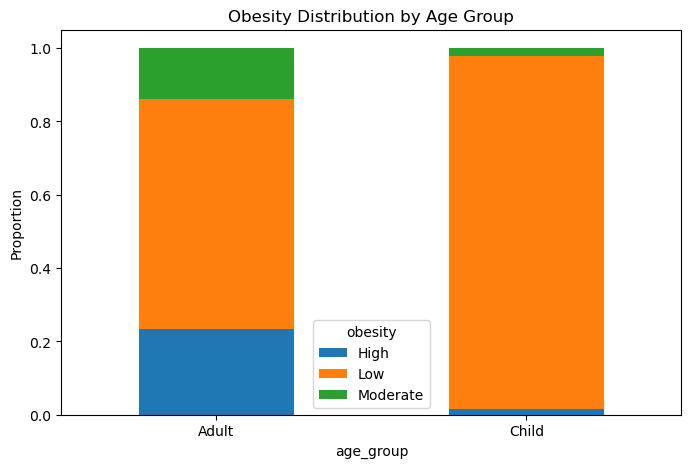

In [57]:
# Age Group vs. Obesity
df_agegroup_obesity = pd.crosstab(df['age_group'], df['obesity'], normalize='index')
df_agegroup_obesity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Obesity Distribution by Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

## Observations from the stacked bar chart of 'Obesity Distribution by Age Group':

    This plot reveals a very strong and clear relationship between age_group and the distribution of obesity categories.

    'Child' age_group is majorly of 'Low' Obesity.

    The proportions of 'Moderate' and 'High' obesity among children are extremely small. 
    
    This suggests that, in this dataset, child obesity is relatively uncommon.

    'Adult' age_group is also majorly of 'Low' obesity, but comparing to the 'child' age_group the 'High' and 'Moderate' obesity segments have larger proportion.

    This plot strongly indicates that adults are considerably more to 'Moderate' and 'High' obesity compared to children in this dataset.

# Summary of the EDA's of obesity dataset

The EDA revealed a dataset rich in demographic(age_group) and geographical(region) information related to obesity

    The majority of observations fall into the 'Low' obesity category. However, the 'High' and 'Moderate' categories are comparatively  smaller, represent crucial areas for intervention and study. This imbalance is a primary concern for predictive modeling.

    Age is the demographic factor:

        Adults show significantly higher obesity estimates and a much greater proportion of 'High' and 'Moderate' obesity compared to 'Children'.
        In univariant analysis even through Number of entries in 'child' age_group is high we are able to see that 'adult' age_group has the significantly higher obesity.
        This suggests that interventions and public health strategies related to obesity should strongly prioritize the adult population.
        Children are to the 'Low' obesity category in this dataset.

    Regional is the geographical factor:

        Western Pacific and Americas regions exhibit the highest obesity estimates and the largest proportions of 'High' and 'Moderate' obesity.These regions likely require attention for obesity prevention and management.
        South-East Asia stands out with almost 'Low' obesity observations

    Gender Shows Minimal Impact on Obesity: 
        Across the all three categories of gender, the proportional distribution of gender categories and obesity are similar for 'Male', 'Female', and 'Both' genders. This indicates that, within this dataset, gender itself is not a strong differentiating factor for obesity.

    Numerical Estimates are Skewed with Outliers:
        The mean_estimate, lower_bound, upper_bound, and ci_width columns are all right-skewed(positively skewed) and contain significant outliers at the higher end. Proper handling of these outliers and data transformation will be essential for robust statistical modeling.

    Data Quality is Generally Good (Post-Imputation): 
        After imputing the missing values in the region column, the dataset is clean with no duplicates.

    In essence, this EDA highlights age and region as the primary role on obesity patterns in this dataset, while gender appears to play a minor role. 

# Handling Outliers
    Since there are many data point outlier of original dataset we preforming different transformation to reduce the outlier

In [61]:
# Apply log transformation
df['lower_bound_transformed'] = np.log(df['lower_bound'])
df['upper_bound_transformed'] = np.log(df['upper_bound'])
df['mean_estimate_transformed'] = np.log(df['mean_estimate'])
df['ci_width_transformed'] = np.log(df['ci_width'])

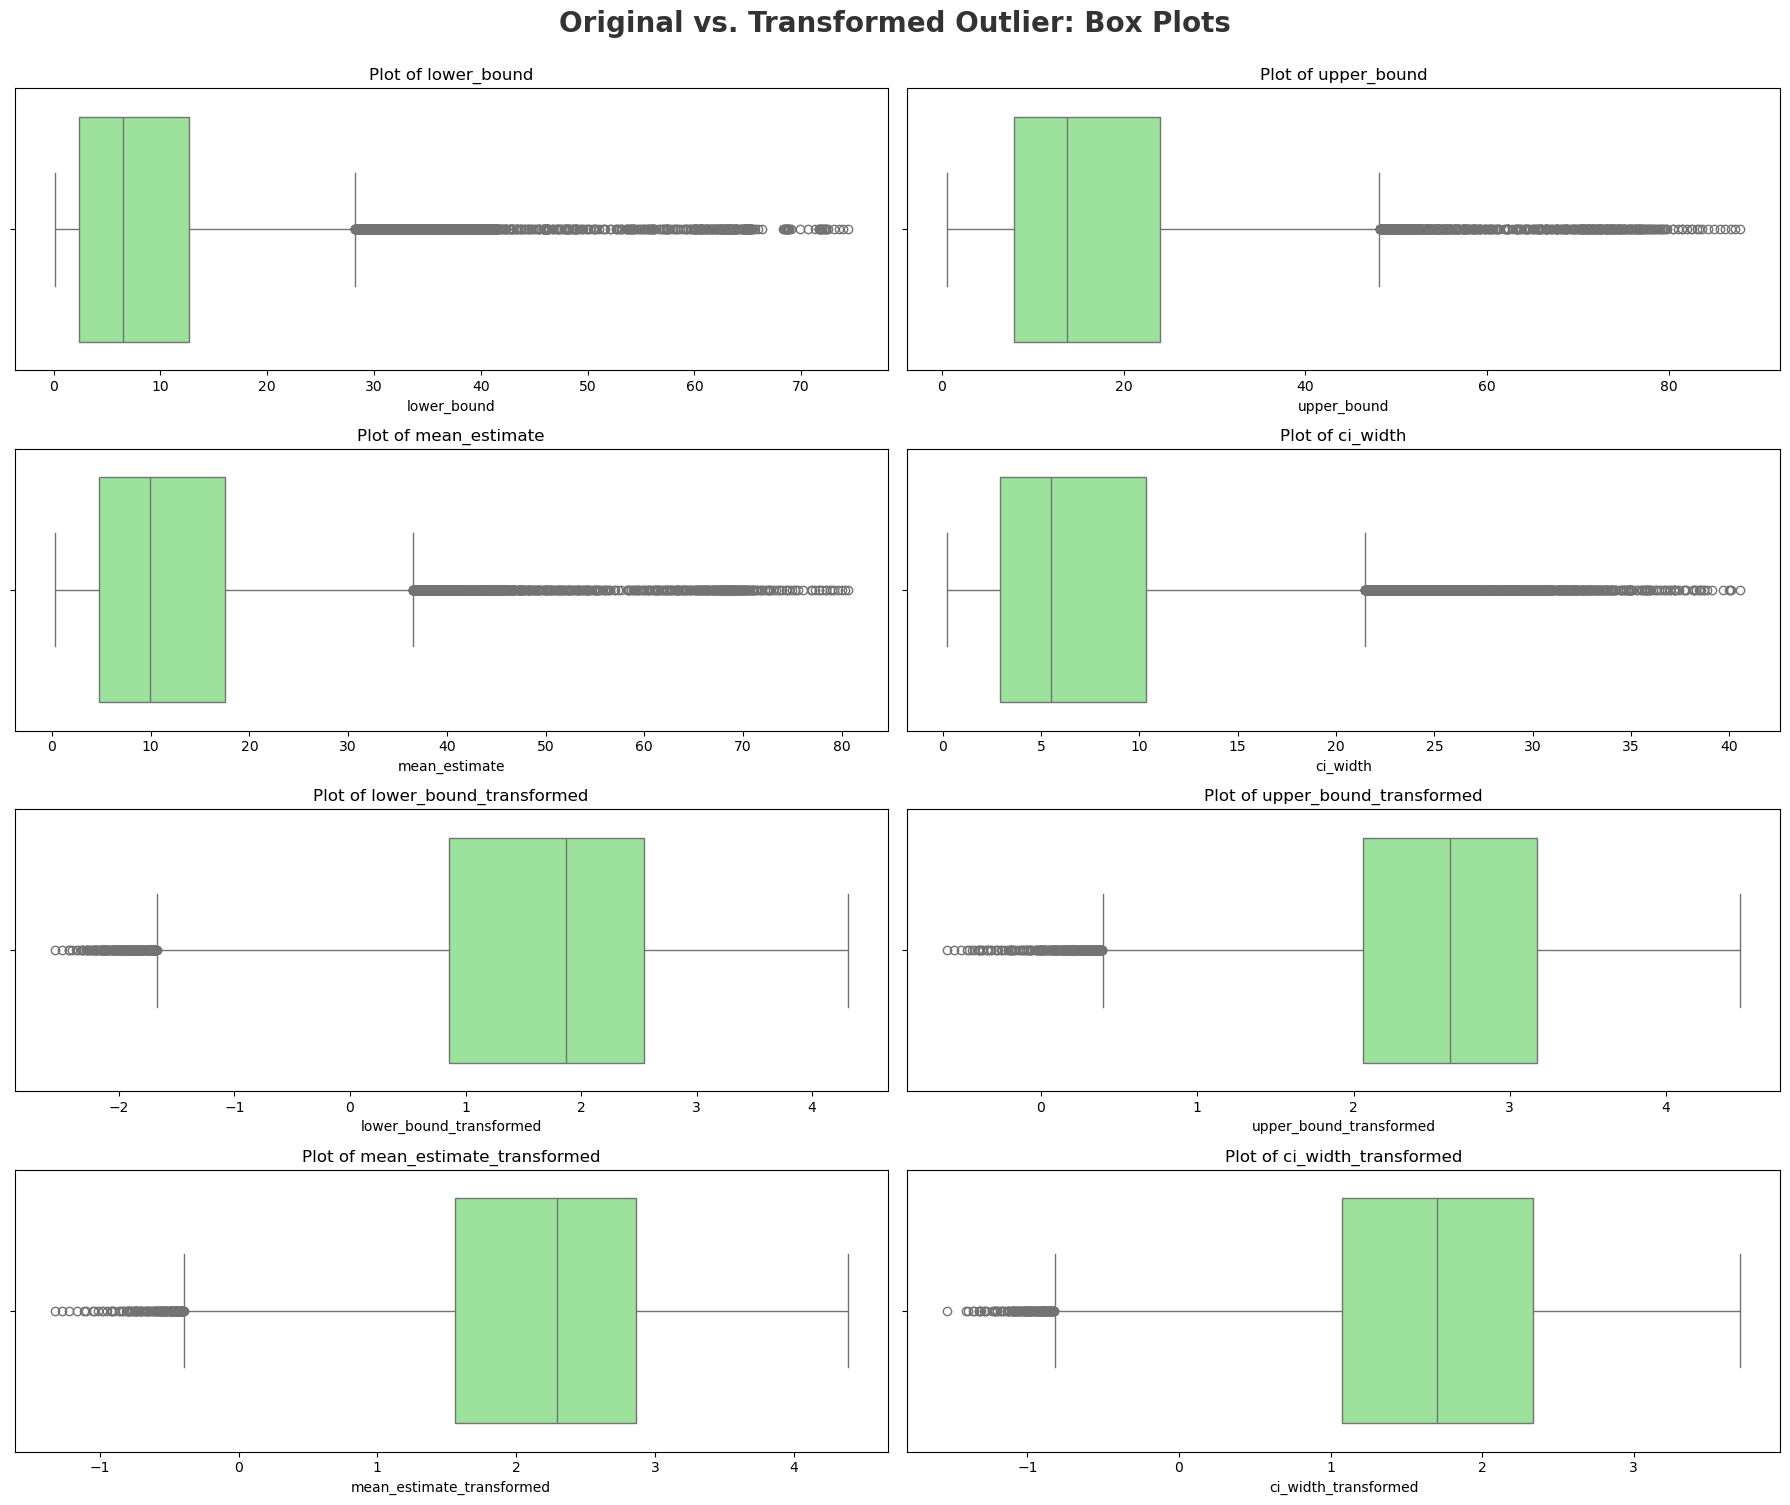

In [62]:
# Box plot of Numerical columns to outliers
numeric_features_transformed = ['lower_bound','upper_bound','mean_estimate','ci_width','lower_bound_transformed','upper_bound_transformed','mean_estimate_transformed','ci_width_transformed']
plt.figure(figsize=(18, 15))
plt.suptitle('Original vs. Transformed Outlier: Box Plots', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i,col in enumerate(numeric_features_transformed):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.xlabel(numeric_features_transformed[i])
    plt.title(f'Plot of {numeric_features_transformed[i]}')
plt.tight_layout()
plt.show()

In [63]:
print('Original Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width'])}')
print('\n')
print('After Transformation Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound_transformed'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound_transformed'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate_transformed'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width_transformed'])}')

Original Number of Outliers in dataset
Number of outliers in Lower bound : 1386
Number of outliers in Upper bound : 580
Number of outliers in Mean estimate : 958
Number of outliers in CI Width : 1478


After Transformation Number of Outliers in dataset
Number of outliers in Lower bound : 215
Number of outliers in Upper bound : 247
Number of outliers in Mean estimate : 148
Number of outliers in CI Width : 125


## Log transform applied on outlier
    After transform we have 215 outlier in lower bound , 247 outlier in upper bound, 148 outlier in mean estimate, 125 outlier in ci width which is in left side of distribution

In [65]:
# Apply log1p transformation
df['lower_bound_transformed'] = np.log1p(df['lower_bound'])
df['upper_bound_transformed'] = np.log1p(df['upper_bound'])
df['mean_estimate_transformed'] = np.log1p(df['mean_estimate'])
df['ci_width_transformed'] = np.log1p(df['ci_width'])

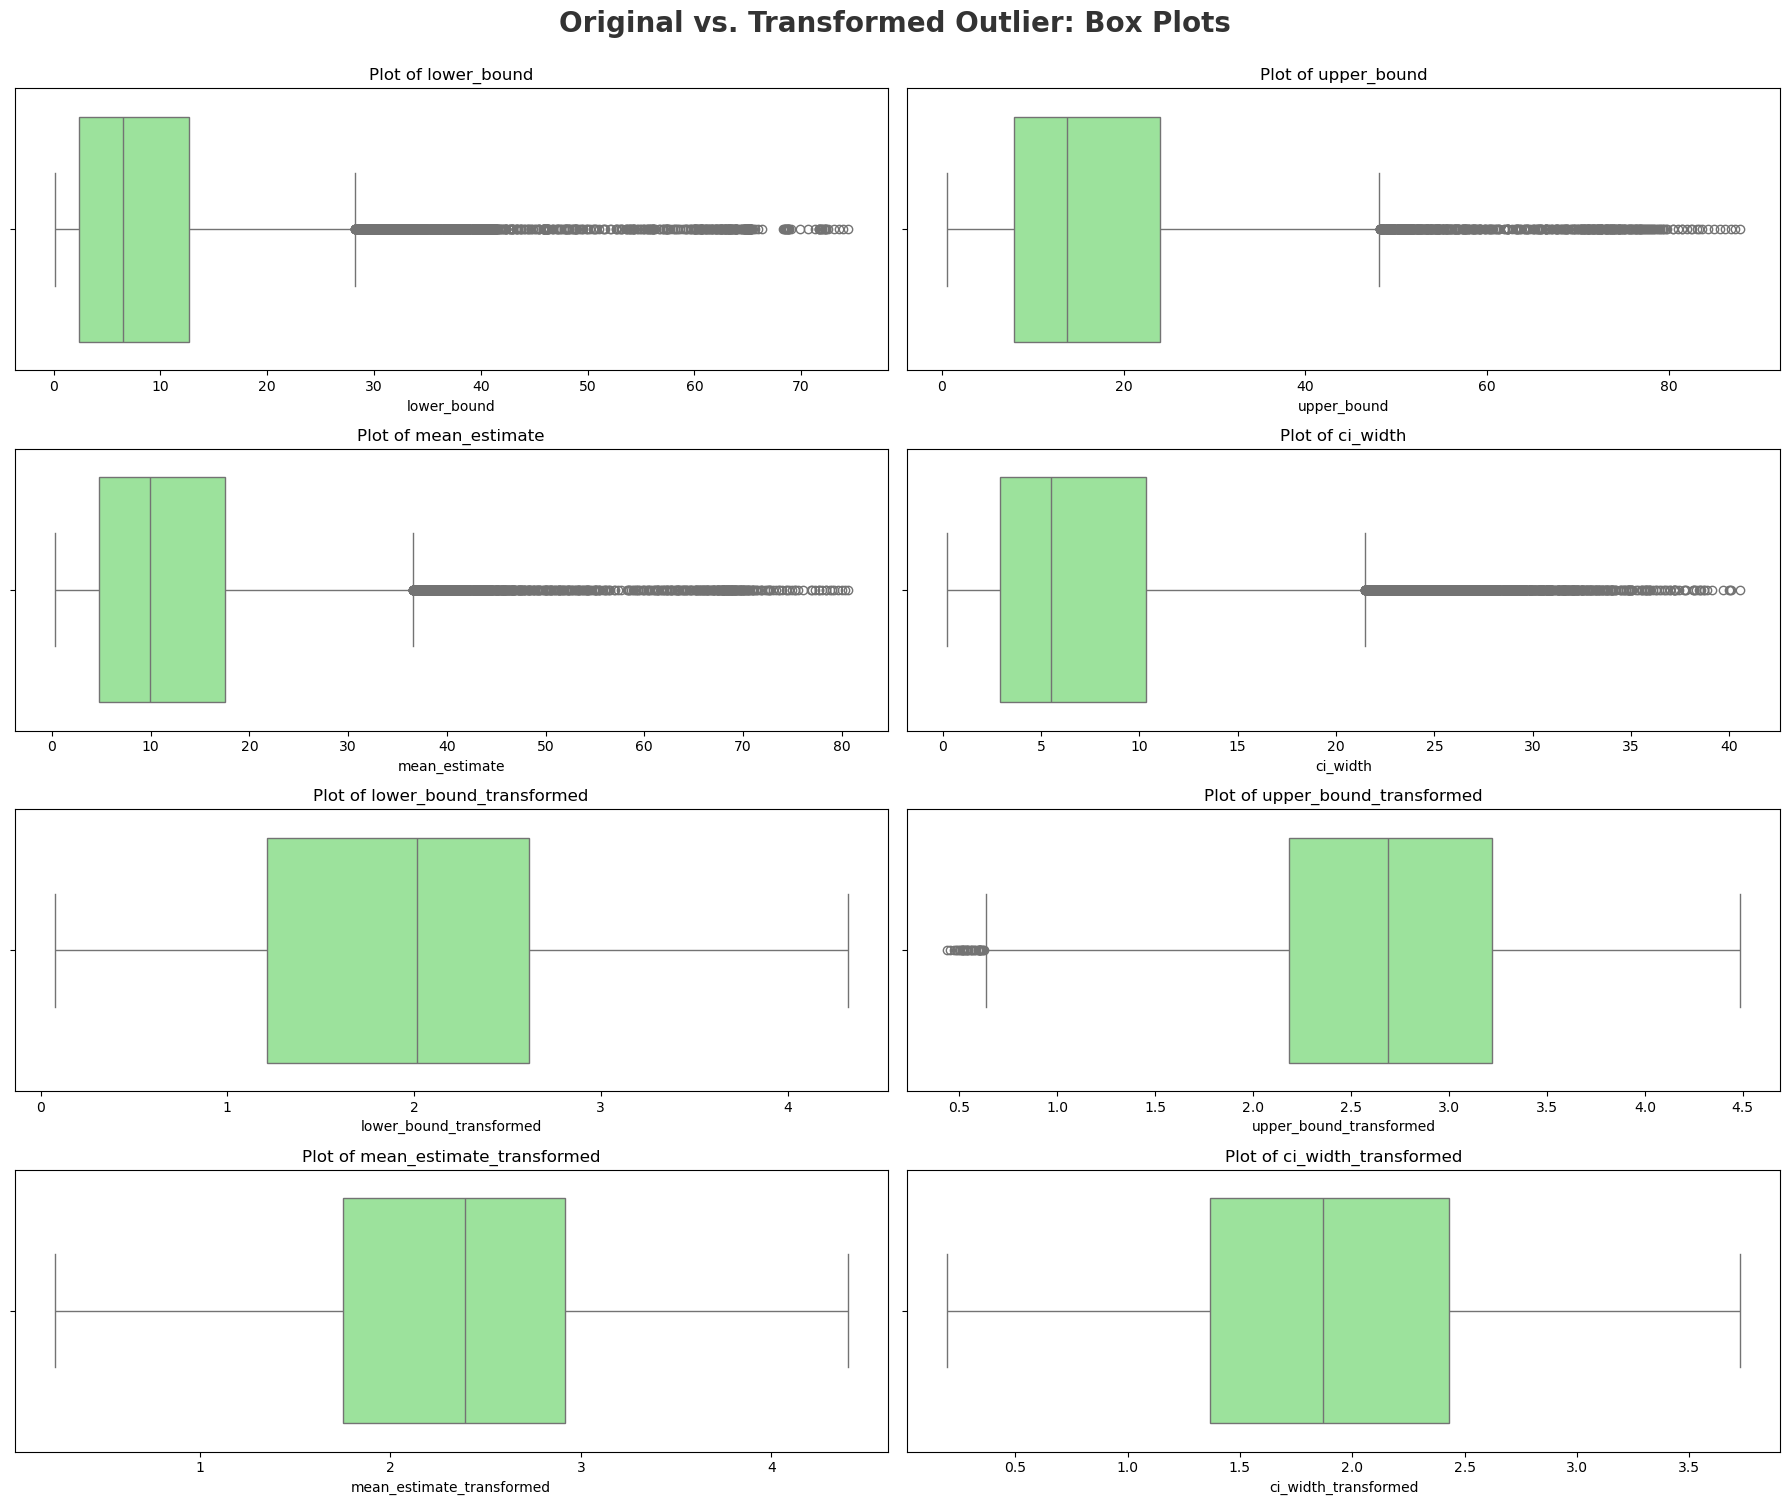

In [66]:
# Box plot of Numerical columns to outliers
numeric_features_transformed = ['lower_bound','upper_bound','mean_estimate','ci_width','lower_bound_transformed','upper_bound_transformed','mean_estimate_transformed','ci_width_transformed']
plt.figure(figsize=(18, 15))
plt.suptitle('Original vs. Transformed Outlier: Box Plots', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i,col in enumerate(numeric_features_transformed):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.xlabel(numeric_features_transformed[i])
    plt.title(f'Plot of {numeric_features_transformed[i]}')
plt.tight_layout()
plt.show()

In [67]:
print('Original Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width'])}')
print('\n')
print('After Transformation Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound_transformed'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound_transformed'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate_transformed'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width_transformed'])}')

Original Number of Outliers in dataset
Number of outliers in Lower bound : 1386
Number of outliers in Upper bound : 580
Number of outliers in Mean estimate : 958
Number of outliers in CI Width : 1478


After Transformation Number of Outliers in dataset
Number of outliers in Lower bound : 0
Number of outliers in Upper bound : 35
Number of outliers in Mean estimate : 0
Number of outliers in CI Width : 0


## Log1p transform applied on outlier
    After transform we have 0 outlier in lower bound , 0 outlier in mean estimate, 0 outlier in ci width and  35 outlier in upper bound which is in left side of the distribution

In [69]:
# Apply square root transformation
df['lower_bound_transformed'] = np.sqrt(df['lower_bound'])
df['upper_bound_transformed'] = np.sqrt(df['upper_bound'])
df['mean_estimate_transformed'] = np.sqrt(df['mean_estimate'])
df['ci_width_transformed'] = np.sqrt(df['ci_width'])

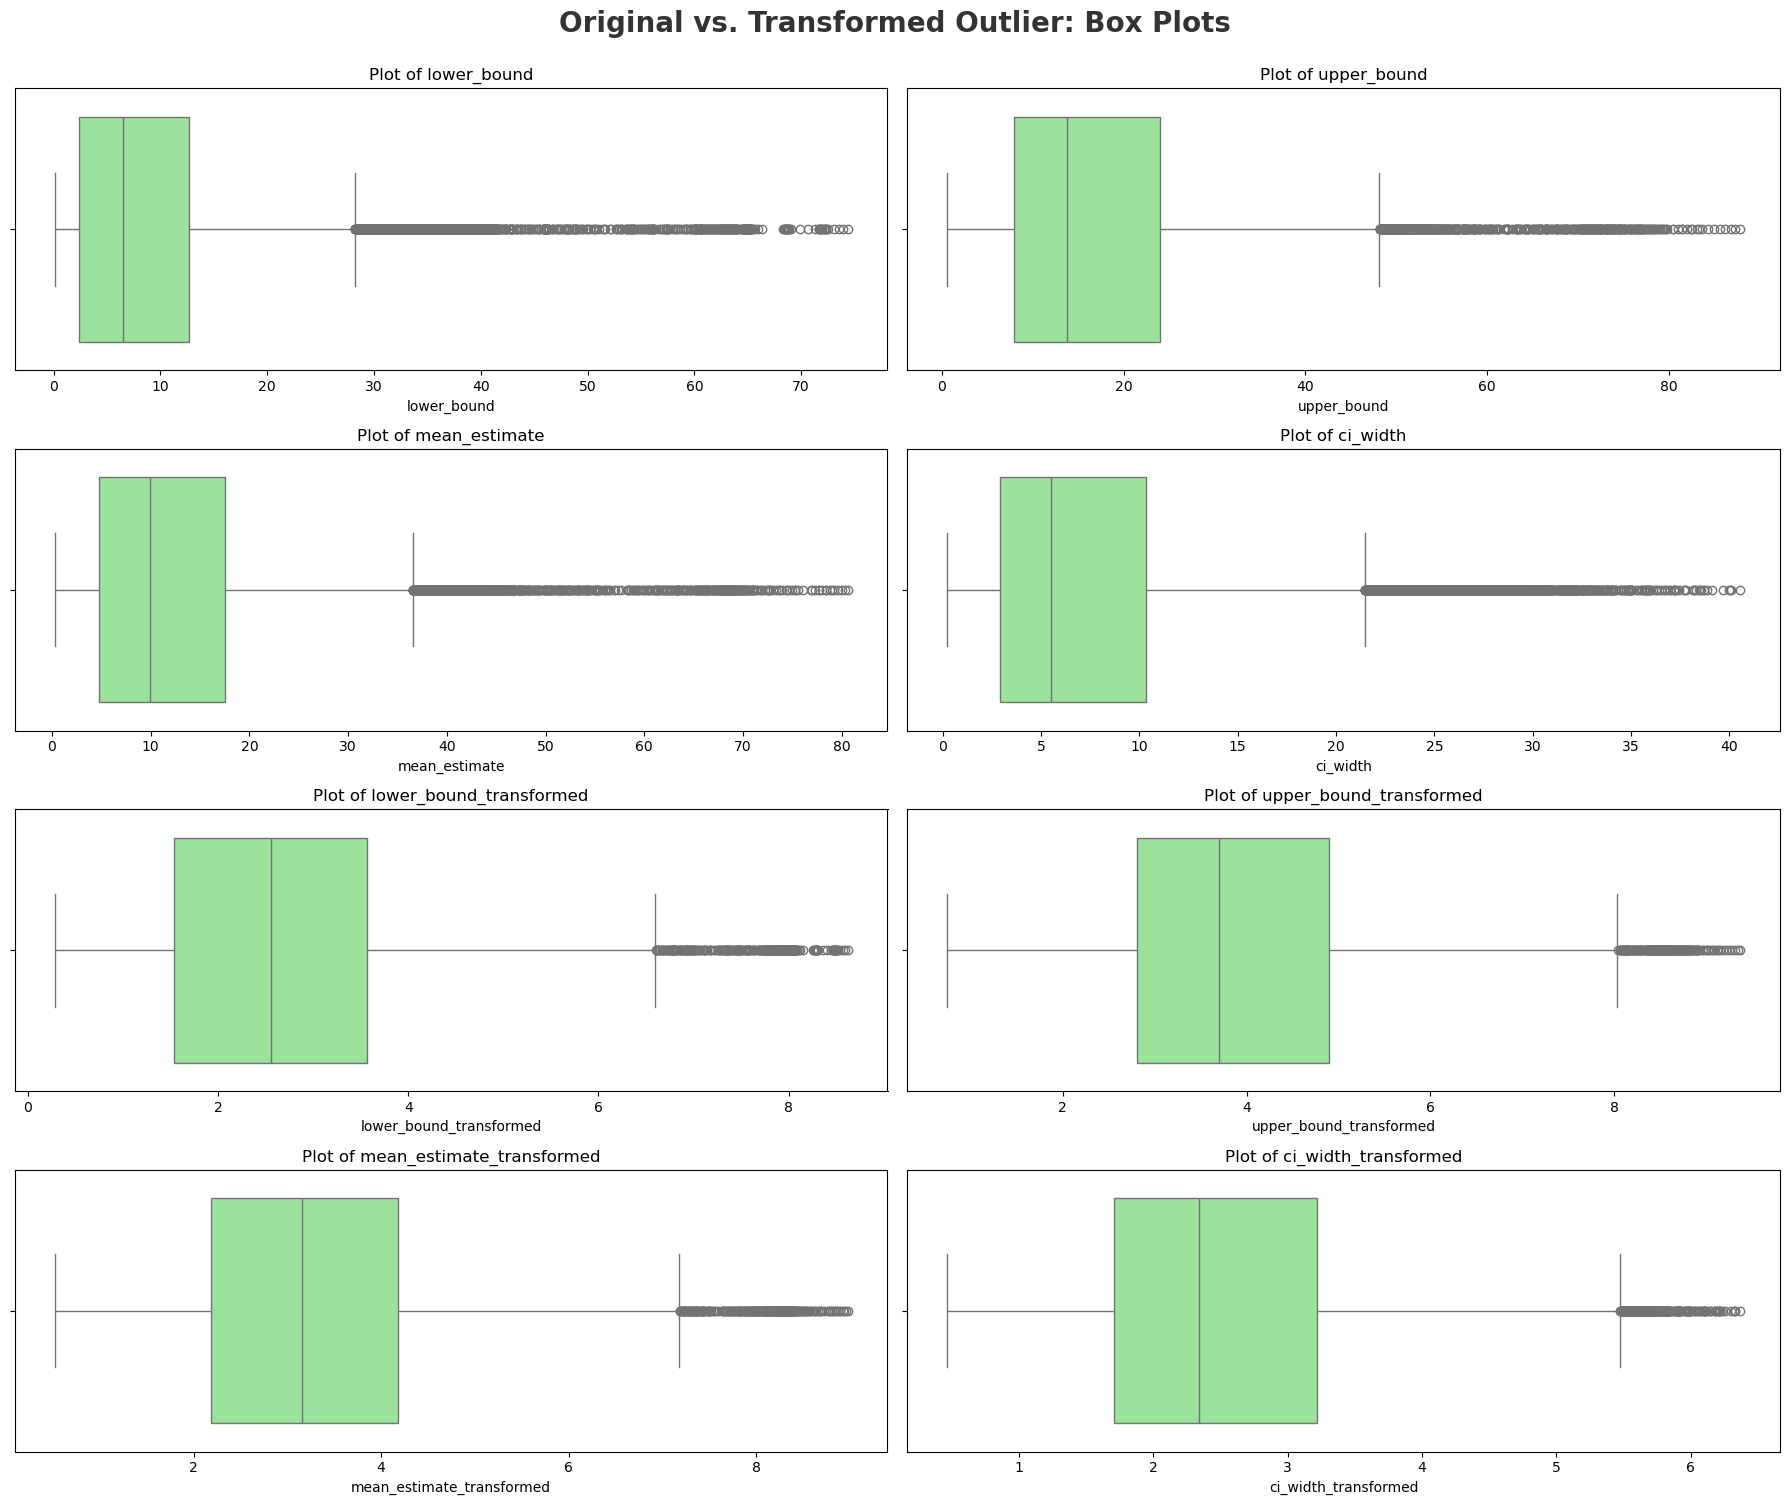

In [70]:
# Box plot of Numerical columns to outliers
numeric_features_transformed = ['lower_bound','upper_bound','mean_estimate','ci_width','lower_bound_transformed','upper_bound_transformed','mean_estimate_transformed','ci_width_transformed']
plt.figure(figsize=(18, 15))
plt.suptitle('Original vs. Transformed Outlier: Box Plots', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i,col in enumerate(numeric_features_transformed):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.xlabel(numeric_features_transformed[i])
    plt.title(f'Plot of {numeric_features_transformed[i]}')
plt.tight_layout()
plt.show()

In [71]:
print('Original Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width'])}')
print('\n')
print('After Transformation Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound_transformed'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound_transformed'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate_transformed'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width_transformed'])}')

Original Number of Outliers in dataset
Number of outliers in Lower bound : 1386
Number of outliers in Upper bound : 580
Number of outliers in Mean estimate : 958
Number of outliers in CI Width : 1478


After Transformation Number of Outliers in dataset
Number of outliers in Lower bound : 321
Number of outliers in Upper bound : 216
Number of outliers in Mean estimate : 287
Number of outliers in CI Width : 283


## Square root transform applied on outlier
    After transform we have 321 outlier in lower bound , 216 outlier in upper bound, 287 outlier in mean estimate, 283 outlier in ci width at right side of the distribution

In [73]:
# Apply Box-Cox transformation
df['lower_bound_transformed'], lambda_ = stats.boxcox(x = df['lower_bound'])
df['upper_bound_transformed'], lambda_ = stats.boxcox(x = df['upper_bound'])
df['mean_estimate_transformed'], lambda_ = stats.boxcox(x = df['mean_estimate'])
df['ci_width_transformed'], lambda_ = stats.boxcox(x = df['ci_width'])

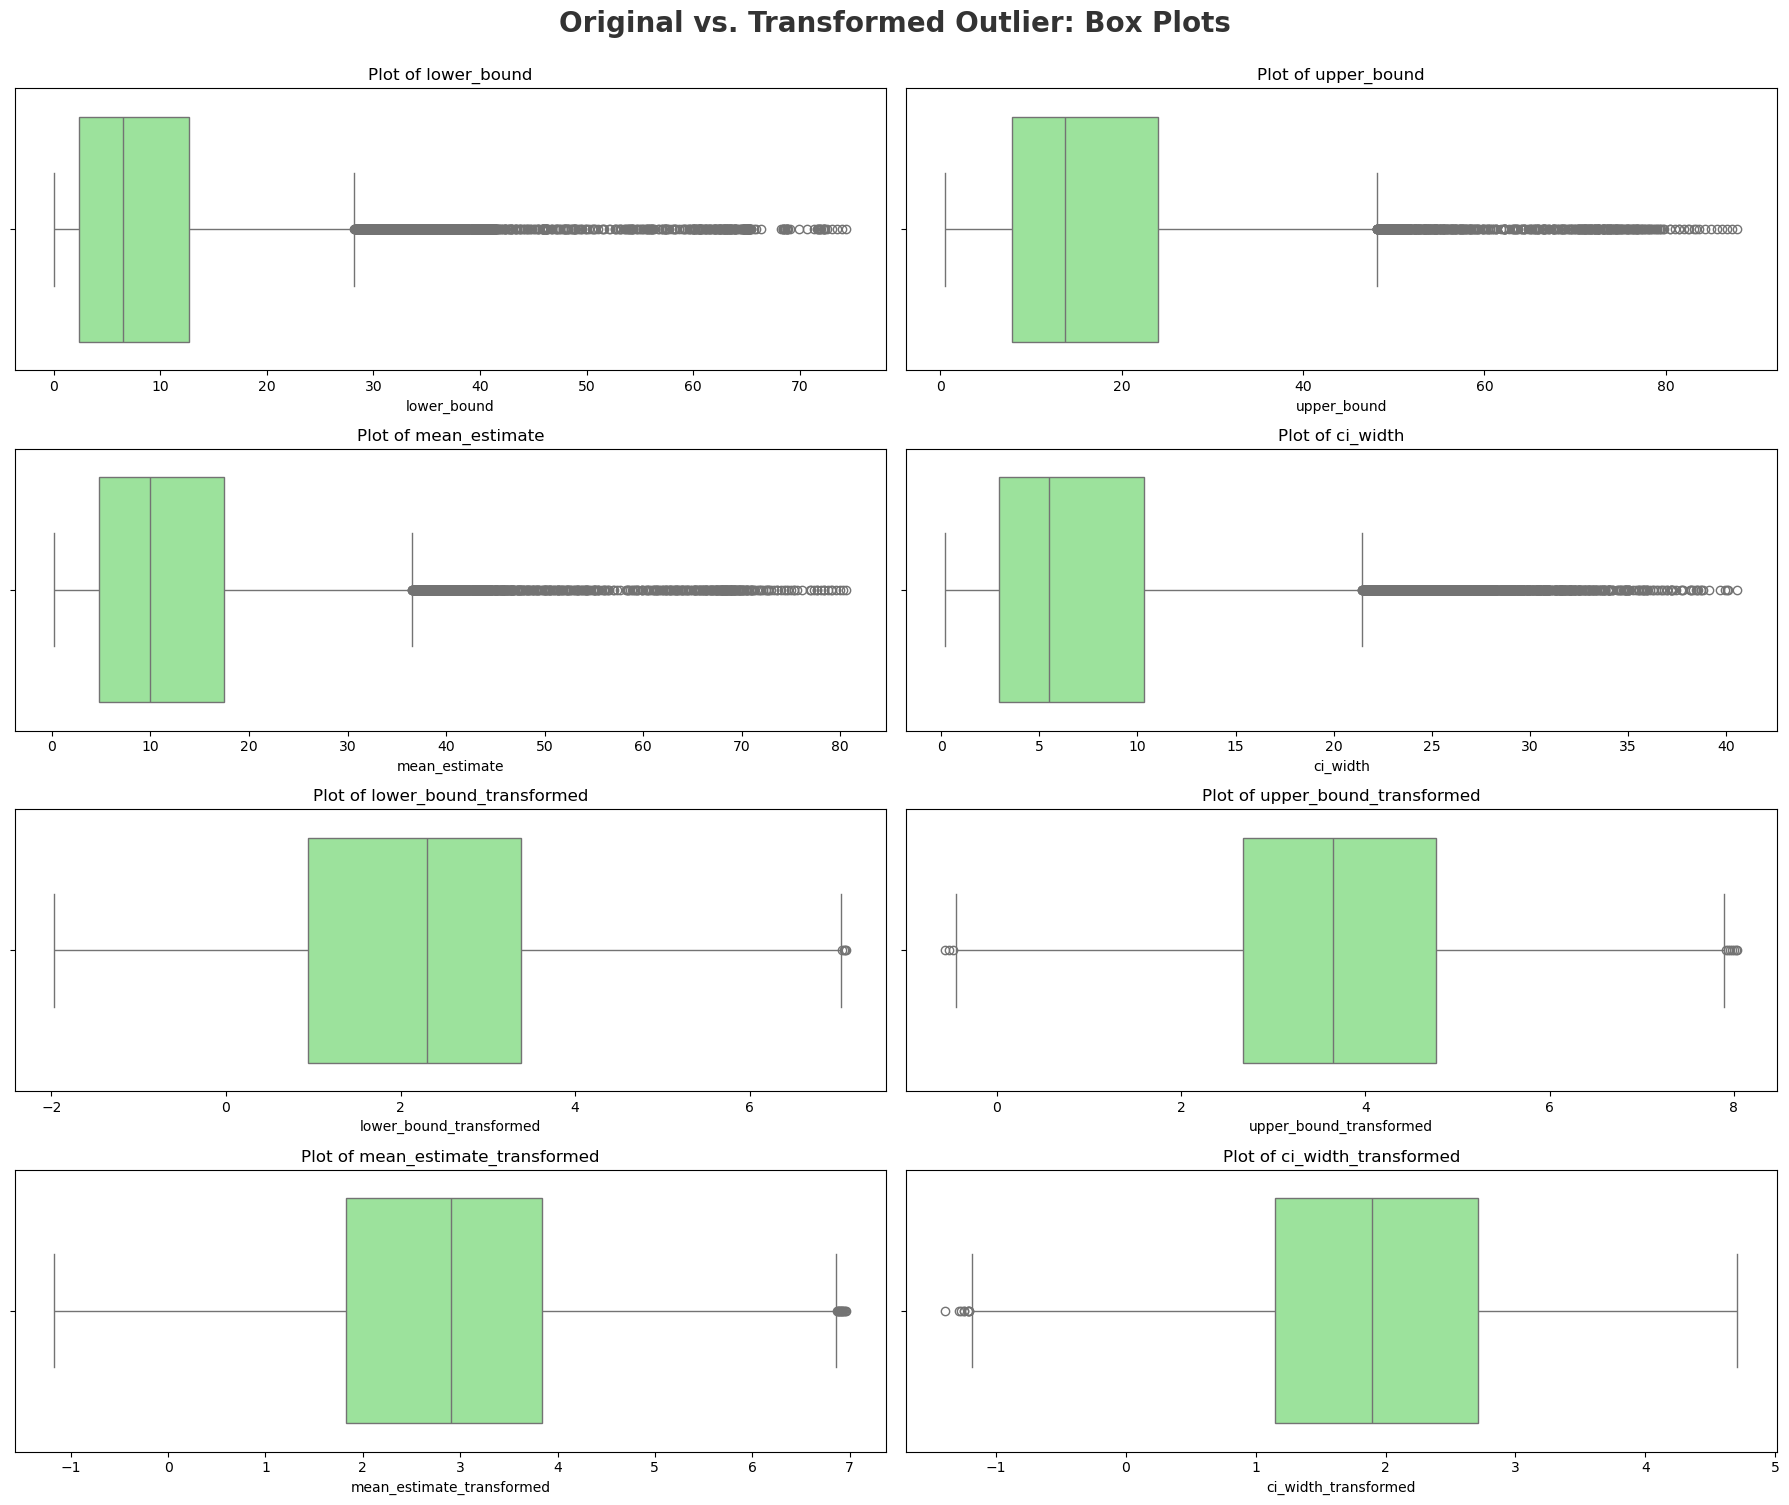

In [74]:
# Box plot of Numerical columns to outliers
numeric_features_transformed = ['lower_bound','upper_bound','mean_estimate','ci_width','lower_bound_transformed','upper_bound_transformed','mean_estimate_transformed','ci_width_transformed']
plt.figure(figsize=(18, 15))
plt.suptitle('Original vs. Transformed Outlier: Box Plots', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i,col in enumerate(numeric_features_transformed):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col],color='lightgreen')
    plt.xlabel(numeric_features_transformed[i])
    plt.title(f'Plot of {numeric_features_transformed[i]}')
plt.tight_layout()
plt.show()

In [75]:
print('Original Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width'])}')
print('\n')
print('After Transformation Number of Outliers in dataset')
print(f'Number of outliers in Lower bound : {count_outliers_iqr(df['lower_bound_transformed'])}')
print(f'Number of outliers in Upper bound : {count_outliers_iqr(df['upper_bound_transformed'])}')
print(f'Number of outliers in Mean estimate : {count_outliers_iqr(df['mean_estimate_transformed'])}')
print(f'Number of outliers in CI Width : {count_outliers_iqr(df['ci_width_transformed'])}')

Original Number of Outliers in dataset
Number of outliers in Lower bound : 1386
Number of outliers in Upper bound : 580
Number of outliers in Mean estimate : 958
Number of outliers in CI Width : 1478


After Transformation Number of Outliers in dataset
Number of outliers in Lower bound : 4
Number of outliers in Upper bound : 10
Number of outliers in Mean estimate : 13
Number of outliers in CI Width : 9


## Box-cox transform applied on outlier
    After transform we have 4 outlier in lower bound , 10 outlier in upper bound, 13 outlier in mean estimate, 9 outlier in ci width

## Observation from the four transformation
    Comparing all the outlier transformation we get least number of outlier in log1p transfomation, So it is best transformation for this dataset to reduce the outliers and get the distribution reduced

# Multivariate Analysis

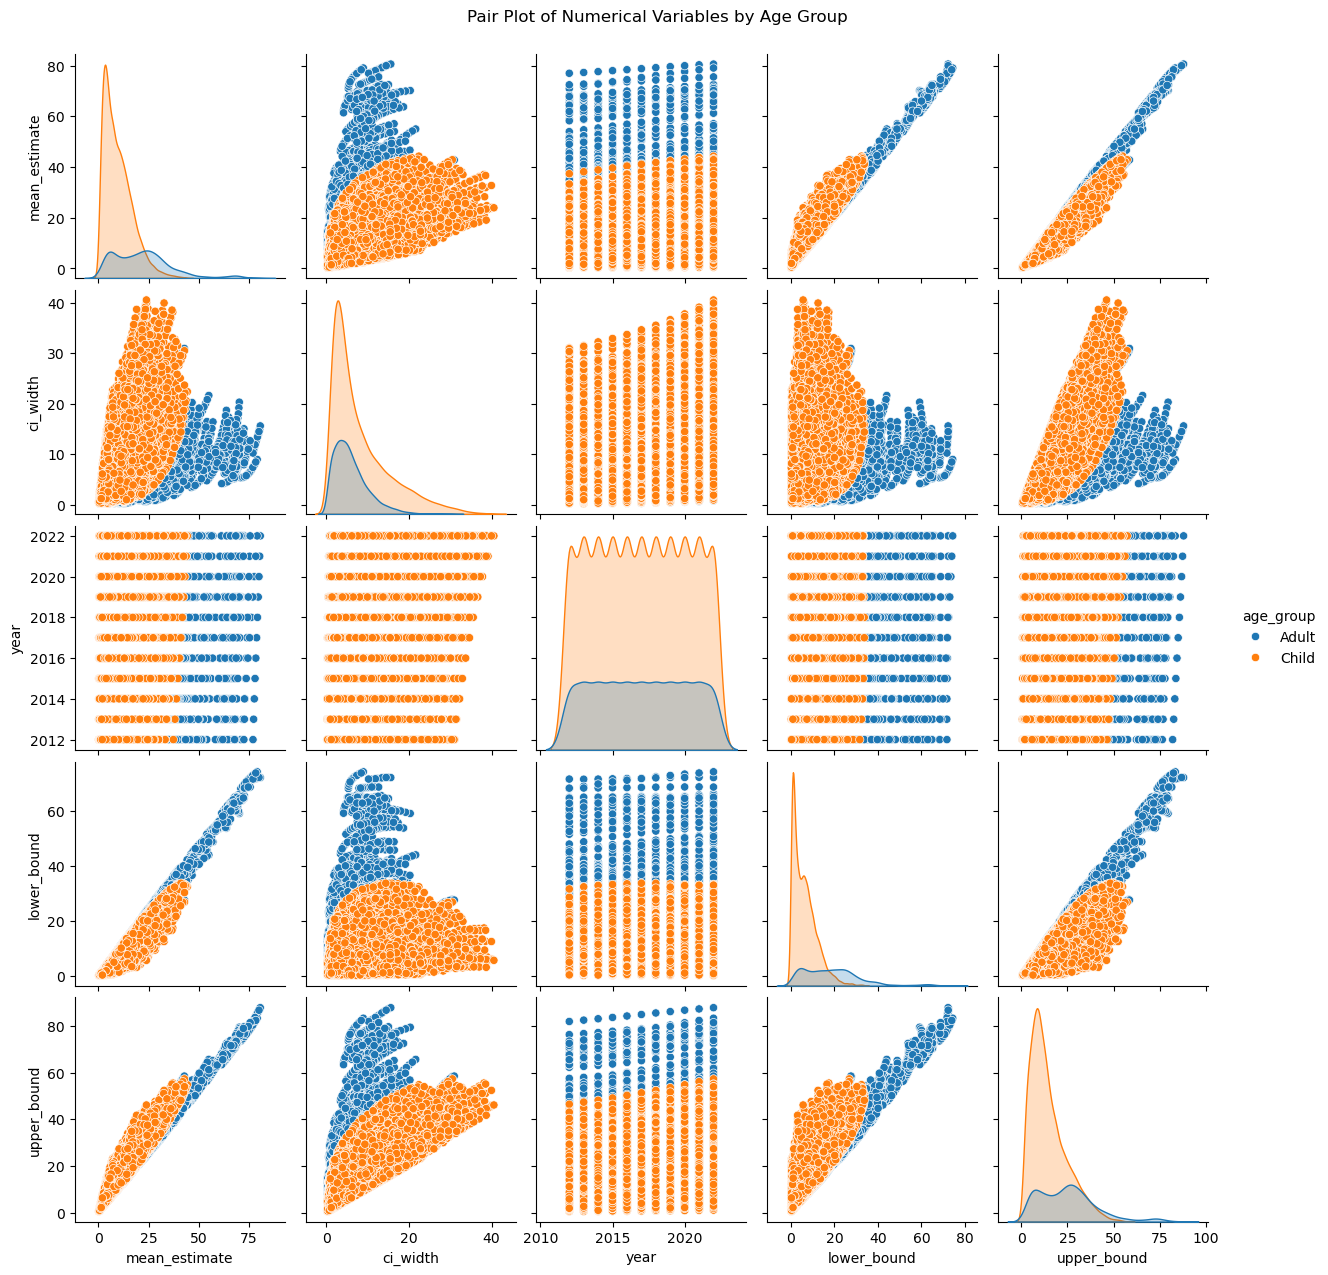

In [79]:
# For a quick overview of numerical relationships, colored by 'age_group'
# This might take some time to run if you have many numerical features
sns.pairplot(df[['mean_estimate', 'ci_width', 'year', 'lower_bound', 'upper_bound', 'age_group']], hue='age_group')
plt.suptitle('Pair Plot of Numerical Variables by Age Group', y=1.02)
plt.show()

# You could also try with 'obesity' or 'gender' as hue
# sns.pairplot(df[['mean_estimate', 'ci_width', 'year', 'obesity']], hue='obesity')